In [1]:
# ===============================
# 1) IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# UK Ice Cream Market overview (static web values or config)
uk_market_revenue_billion_gc = 4.94  # UK frozen dessert/ice cream total revenue, 2025 est (bn USD) :contentReference[oaicite:6]{index=6}
uk_market_growth_pct = 6.56         # UK segment CAGR to 2025 :contentReference[oaicite:7]{index=7}

print("UK Ice Cream Market ~${}B & ~{}% growth".format(
      uk_market_revenue_billion_gc, uk_market_growth_pct))

UK Ice Cream Market ~$4.94B & ~6.56% growth


In [3]:
# Create a list of store IDs
store_ids = [f"UK_{i:03d}" for i in range(1, 101)]  # ~100 locations

# Generate synthetic sales per hour
sales_data = []
for store in store_ids:
    for day in range(180):  # 6 months
        for hour in range(10,22):  # 10am–10pm
            dt = datetime(2025,1,1) + timedelta(days=day, hours=hour)
            base_rev = np.random.normal(250, 60)  # synthetic baseline
            trans = np.random.poisson(12) 
            avg_check = (base_rev/trans) if trans > 0 else 0
            sales_data.append((store, dt, base_rev, trans, avg_check))

sales_df = pd.DataFrame(sales_data, 
                        columns=['store','datetime','revenue','transactions','avg_check'])
sales_df.head()

,store,datetime,revenue,transactions,avg_check
0,UK_001,2025-01-01 10:00:00,253.964749,11,23.087704
1,UK_001,2025-01-01 11:00:00,202.165747,8,25.270718
2,UK_001,2025-01-01 12:00:00,291.254202,10,29.125420
3,UK_001,2025-01-01 13:00:00,444.295942,14,31.735424
4,UK_001,2025-01-01 14:00:00,251.936774,17,14.819810


In [4]:
menu = ['Single Scoop','Double Scoop','Waffle Cone','Milkshake','Sundae','Ice Cream Cake','Vegan Option']
cost = {'Single Scoop':1.1,'Double Scoop':1.9,'Waffle Cone':1.8,'Milkshake':2.7,'Sundae':2.2,'Ice Cream Cake':3.5,'Vegan Option':1.6}
price = {'Single Scoop':3.8,'Double Scoop':6.0,'Waffle Cone':5.0,'Milkshake':5.2,'Sundae':6.8,'Ice Cream Cake':9.0,'Vegan Option':4.5}

menu_records = []
for m in menu:
    sold = np.random.randint(300,1800)
    revenue = sold * price[m]
    profit = sold * (price[m] - cost[m])
    menu_records.append([m, sold, revenue, profit, profit/revenue*100])

menu_df = pd.DataFrame(menu_records, 
                       columns=['item','units_sold','revenue','profit','margin_pct'])
menu_df

,item,units_sold,revenue,profit,margin_pct
0,Single Scoop,1793,6813.4,4841.1,71.052632
1,Double Scoop,940,5640.0,3854.0,68.333333
2,Waffle Cone,858,4290.0,2745.6,64.000000
3,Milkshake,1411,7337.2,3527.5,48.076923
4,Sundae,1797,12219.6,8266.2,67.647059
5,Ice Cream Cake,1514,13626.0,8327.0,61.111111
6,Vegan Option,1670,7515.0,4843.0,64.444444


In [7]:
import pandas as pd
import numpy as np

# Example menu dataframe
menu_df = pd.DataFrame({
    'item_name': ['Burger', 'Pizza', 'Salad', 'Burger', 'Salad'],
    'units_sold': [120, 85, 60, 150, 95]
})

# Cost dictionary (cost per unit)
cost = {
    'Burger': 2.50,
    'Pizza': 3.00,
    'Salad': 1.75
}

# Map cost to each row and calculate food cost
menu_df['food_cost_pct'] = (
    menu_df['units_sold'] *
    menu_df['item_name'].map(cost)
)

# Add inventory turnover column
menu_df['inv_turnover'] = np.random.uniform(4, 22, len(menu_df))

# Display result
menu_df

,item_name,units_sold,food_cost_pct,inv_turnover
0,Burger,120,300.00,14.731427
1,Pizza,85,255.00,11.184524
2,Salad,60,105.00,9.447854
3,Burger,150,375.00,20.040588
4,Salad,95,166.25,10.033110


In [8]:
customer = pd.DataFrame({
    'age': np.random.choice(range(10,80),800),
    'gender': np.random.choice(['Male','Female','Other'],800),
    'frequency': np.random.poisson(3,800),
    'feedback_score': np.random.randint(1,6,800),
    'special_req': np.random.choice(['None','Extra Toppings','No Sugar','Vegan'],800)
})
customer.describe()

,age,frequency,feedback_score
count,800.000000,800.000000,800.000000
mean,43.836250,2.983750,2.986250
std,20.499139,1.698409,1.385084
min,10.000000,0.000000,1.000000
25%,26.000000,2.000000,2.000000
50%,44.000000,3.000000,3.000000
75%,62.000000,4.000000,4.000000
max,79.000000,9.000000,5.000000


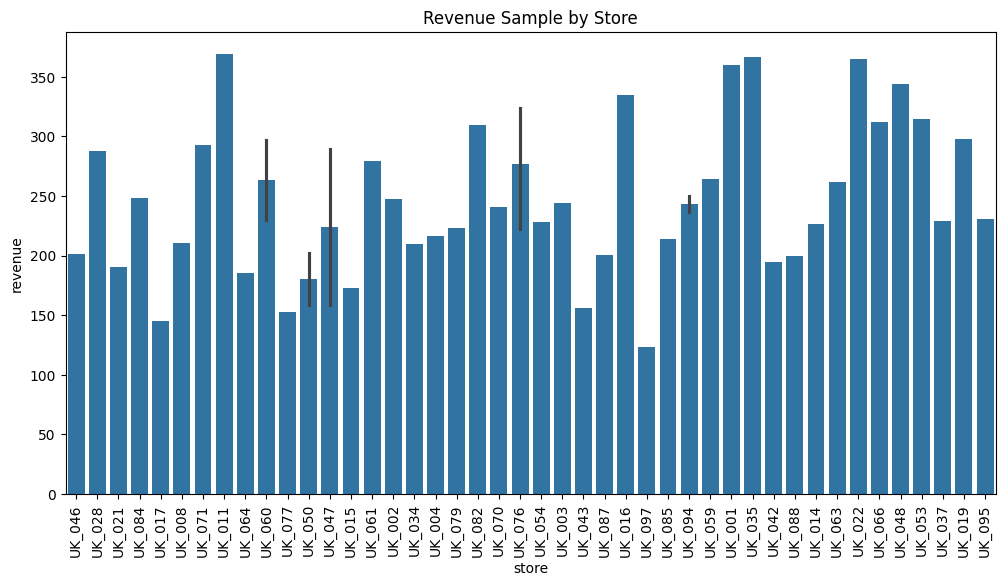

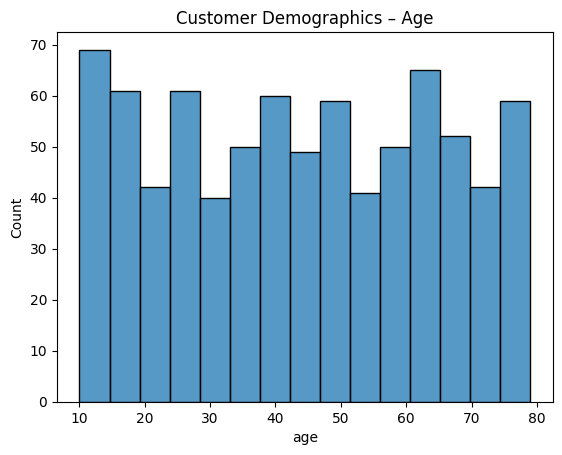

In [9]:
# Revenue by store
plt.figure(figsize=(12,6))
sns.barplot(x='store', y='revenue', data=sales_df.sample(50))
plt.title("Revenue Sample by Store")
plt.xticks(rotation=90)
plt.show()

# Customer age dist
sns.histplot(customer['age'], bins=15)
plt.title("Customer Demographics – Age")
plt.show()